In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
dataset = pd.read_csv("GOOG.csv")

In [3]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...,...
4243,2021-06-28,2540.000000,2546.739990,2519.476074,2536.389893,2536.389893,1405500
4244,2021-06-29,2535.449951,2540.000000,2508.739990,2520.370117,2520.370117,1047500
4245,2021-06-30,2513.071045,2516.000000,2495.149902,2506.320068,2506.320068,1200300
4246,2021-07-01,2496.995117,2529.250000,2496.995117,2527.370117,2527.370117,856000


In [4]:
dataset.shape

(4248, 7)

In [5]:
dataset = dataset['Open']

In [6]:
dataset = np.array(dataset)

In [7]:
dataset.shape

(4248,)

In [8]:
dataset = dataset.reshape((-1,1))
normalizer = MinMaxScaler(feature_range=(0,1))
dataset = normalizer.fit_transform(dataset)

In [9]:
dataset

array([[1.61935801e-04],
       [3.63854179e-04],
       [2.31107590e-03],
       ...,
       [9.88762905e-01],
       [9.82311011e-01],
       [9.98282258e-01]])

In [10]:
dataset.shape

(4248, 1)

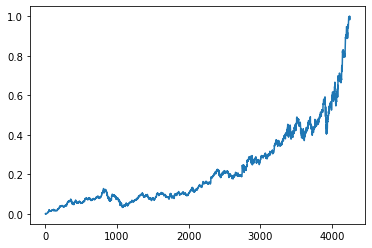

In [11]:
plt.plot(dataset)

In [12]:
training_dataset = dataset[:4000]

In [13]:
training_dataset.shape

(4000, 1)

In [14]:
testing_dataset = dataset[4000:]

In [15]:
testing_dataset.shape

(248, 1)

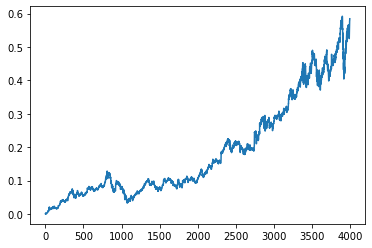

In [16]:
plt.plot(training_dataset)

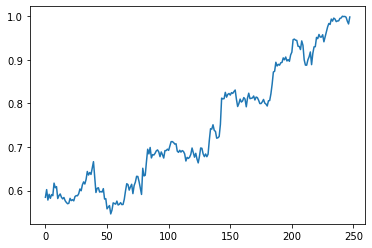

In [17]:
plt.plot(testing_dataset)

In [18]:
def create_dataset(data,step):
    x=[]
    y=[]
    for i in range(len(data)-step):
        x.append(data[i:i+step])
        y.append(data[i+step])
    return np.array(x),np.array(y)
        

In [19]:
trainX , trainY = create_dataset(training_dataset,60)

In [20]:
trainX.shape

(3940, 60, 1)

In [21]:
trainY.shape

(3940, 1)

In [22]:
testX , testY = create_dataset(testing_dataset,60)

In [23]:
from keras import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [24]:
model = Sequential()

In [25]:
model.add(LSTM(units=60,return_sequences=True,input_shape=(60,1)))

In [26]:
model.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 60, 1),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'lstm_input'}},
  {'class_name': 'LSTM',
   'config': {'name': 'lstm',
    'trainable': True,
    'batch_input_shape': (None, 60, 1),
    'dtype': 'float32',
    'return_sequences': True,
    'return_state': False,
    'go_backwards': False,
    'stateful': False,
    'unroll': False,
    'time_major': False,
    'units': 60,
    'activation': 'tanh',
    'recurrent_activation': 'sigmoid',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'recurrent_initializer': {'class_name': 'Orthogonal',
     'config': {'gain': 1.0, 'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'unit_forget_bias': True,
    'kernel_regularizer': None,
    'recurrent_regularizer': None,
    'bias_regularizer': None,
    'activ

In [27]:
model.add(LSTM(units=60,return_sequences=True))

In [28]:
model.add(LSTM(units=60))

In [29]:
model.add(Dense(units=1,activation="linear"))

In [30]:
model.compile(loss='mean_squared_error',optimizer="adam")

In [31]:
model.fit(trainX,trainY,epochs=20)

Epoch 1/20
124/124 [==============================] - 38s 226ms/step - loss: 0.0059
Epoch 2/20
124/124 [==============================] - 28s 228ms/step - loss: 1.3864e-04
Epoch 3/20
124/124 [==============================] - 29s 230ms/step - loss: 1.3517e-04
Epoch 4/20
124/124 [==============================] - 29s 235ms/step - loss: 1.4555e-04
Epoch 5/20
124/124 [==============================] - 29s 236ms/step - loss: 1.6363e-04
Epoch 6/20
124/124 [==============================] - 30s 239ms/step - loss: 1.0565e-04
Epoch 7/20
124/124 [==============================] - 30s 239ms/step - loss: 1.5175e-04
Epoch 8/20
124/124 [==============================] - 31s 249ms/step - loss: 8.6432e-05
Epoch 9/20
124/124 [==============================] - 30s 242ms/step - loss: 8.9660e-05
Epoch 10/20
124/124 [==============================] - 30s 241ms/step - loss: 7.5395e-05
Epoch 11/20
124/124 [==============================] - 30s 240ms/step - loss: 6.9858e-05
Epoch 12/20
124/124 [=============

In [32]:
loss = model.history.history["loss"]

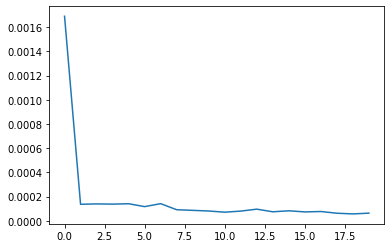

In [33]:
plt.plot(loss)

In [35]:
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

In [38]:
predicted = np.vstack((train_predict,test_predict))

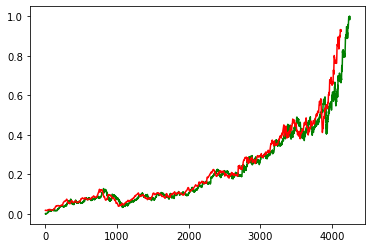

In [41]:
plt.plot(dataset,color="green")
plt.plot(predicted,color="red")